# Midterm Review


In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
# Read in a Data file
nba = Table.read_table("nba.csv")
nba

rank | name             | position | team                   | salary   | season
1    | Shaquille O'Neal | C        | Los Angeles Lakers     | 17142000 | 2000
2    | Kevin Garnett    | PF       | Minnesota Timberwolves | 16806000 | 2000
3    | Alonzo Mourning  | C        | Miami Heat             | 15004000 | 2000
4    | Juwan Howard     | PF       | Washington Wizards     | 15000000 | 2000
5    | Scottie Pippen   | SF       | Portland Trail Blazers | 14795000 | 2000
6    | Karl Malone      | PF       | Utah Jazz              | 14000000 | 2000
7    | Larry Johnson    | F        | New York Knicks        | 11910000 | 2000
8    | Gary Payton      | PG       | Seattle SuperSonics    | 11020000 | 2000
9    | Rasheed Wallace  | PF       | Portland Trail Blazers | 10800000 | 2000
10   | Shawn Kemp       | C        | Cleveland Cavaliers    | 10780000 | 2000
... (9446 rows omitted)

In [4]:
# The name of the 3rd highest paid NBA PLAYER
nba.sort("salary", descending=True).column("name").item(2)

'Russell Westbrook'

In [5]:
# The number of centers in the team that has the most centers
max(nba.where("position", are.equal_to("C")).group("team").column('count'))

85

# Simulation

In [6]:
# Generate Random Sample from an array of values
name_array = make_array("Controlled", "Treatment")
sample_size = 10
np.random.choice(name_array, sample_size)

array(['Controlled', 'Treatment', 'Treatment', 'Controlled', 'Controlled',
       'Controlled', 'Controlled', 'Treatment', 'Controlled', 'Treatment'],
      dtype='<U10')

In [7]:
#Generate Random Sample from a table with replacement - you can have duplicate records
nba.sample(sample_size)

rank | name            | position | team                   | salary  | season
248  | Marquese Chriss | C        | Houston Rockets        | 3206160 | 2019
395  | Royce O'Neale   | SF       | Utah Jazz              | 1618520 | 2020
500  | Dillon Brooks   | SG       | Memphis Grizzlies      | 815615  | 2018
83   | Chris Childs    | G        | Toronto Raptors        | 5200000 | 2002
313  | Moritz Wagner   | SF       | Los Angeles Lakers     | 1762080 | 2019
68   | Lamond Murray   | SF       | Toronto Raptors        | 4875000 | 2005
400  | Dean Oliver     | G        | Golden State Warriors  | 333000  | 2002
263  | Zach LaVine     | PG       | Minnesota Timberwolves | 2148360 | 2016
301  | Mark Madsen     | PF       | Los Angeles Lakers     | 707000  | 2001
177  | Greg Buckner    | SG       | Memphis Grizzlies      | 4010005 | 2009

In [8]:
#Generate Random Sample from a table without replacement
nba.sample(sample_size, with_replacement=False)

rank | name            | position | team                   | salary   | season
258  | Greg Stiemsma   | C        | Minnesota Timberwolves | 2575000  | 2013
452  | Dairis Bertans  | G        | New Orleans Pelicans   | 1416852  | 2020
499  | John Lucas III  | PG       | Detroit Pistons        | 269189   | 2015
237  | Tyronn Lue      | PG       | Washington Wizards     | 1714000  | 2002
155  | Otto Porter Jr. | SF       | Washington Wizards     | 4662960  | 2016
568  | Omri Casspi     | F        | Sacramento Kings       | 138414   | 2017
51   | Andrew Bogut    | C        | Milwaukee Bucks        | 11000000 | 2011
207  | Grant Hill      | SF       | Phoenix Suns           | 3240000  | 2011
582  | Alonzo Gee      | SF       | Denver Nuggets         | 57672    | 2017
224  | Aaron McKie     | SG       | Philadelphia 76ers     | 1820000  | 2001

In [9]:
# Use values in Table to shuffle the results
nba_2015 = nba.where("season", are.equal_to(2015)).select('position', 'salary')
shuffled = nba_2015.select('position').sample(with_replacement=False).column(0)
nba_2015 = nba_2015.with_column("shuffled", shuffled)
nba_2015

position | salary   | shuffled
SF       | 23500000 | F
G        | 23180790 | SG
PF       | 22458401 | G
C        | 21436271 | PG
PF       | 20644400 | SF
SF       | 20644400 | C
PG       | 20068563 | SF
PG       | 19754465 | SG
SF       | 19317326 | PG
SF       | 18995624 | PF
... (517 rows omitted)

In [10]:
# Roll one die and if they get value less than or equal to 2 losses $1 if 3 or 4 win nothing if 5 or 6 wins 1
def bet_on_one_roll():
    x = np.random.choice(np.arange(1,7))
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1



In [11]:
# Repeat the process m times
m = 5
outcomes = make_array()
for i in np.arange(m):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)



# Using Density Scale
## Given the chart below<br>
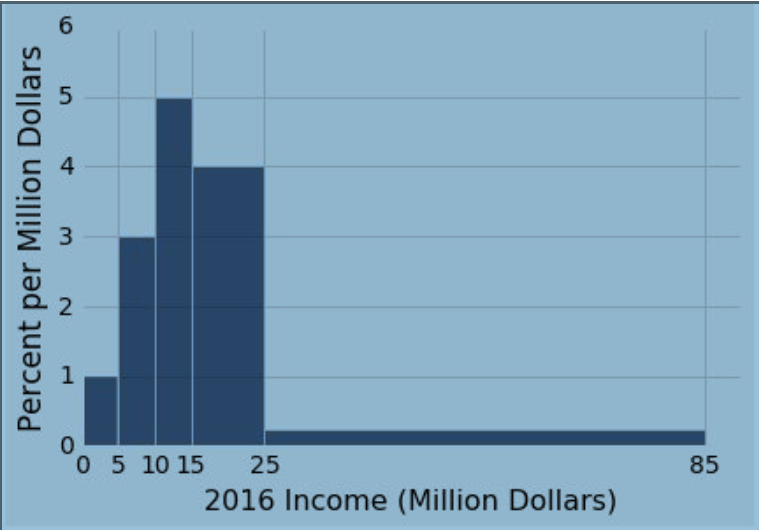

- Which bin has more people  [10, 15) or [15, 25)?
- What percent of incomes are in the [15, 25) bin?
- If you draw one bar over [10, 25). how tall will it be?
- What percent make 75 million or more?

# Calculating Chance
- What does the first trial have to be
- list all the distinct ways your event could occur and add up their chances.
- If the list is long and complicated look at the completment if it is easier (1 - P(None))

## Marbles: G, G, G, G, R, R, R, R, R, R.  Draw 3 at random with replacement.

- P(all G) = (4/10)*(4/10)*(4/10)<br>
- P(all R) = (6/10)*(6/10)*(6/10)<br>
- P(all same color) = P(all G) + P(all R)<br>
- P(at least one G) = P(at least one G) = 1 - P(no G) = 1 - P(all R_ = 1 - (6/10)*(6/10)*(6/10)<br>

## Marbles: G, G, G, G, R, R, R, R, R, R.  Draw 3 at random without replacement.

- P(all G) = (4/10)*(3/9)*(2/8)<br>
- P(all R) = (6/10)*(5/9)*(4/8)<br>
- P(all same color) = P(all G) + P(all R)<br>
- P(at least one G) = P(at least one G) = 1 - P(no G) = 1 - P(all R_ = 1 - (6/10)*(6/10)*(6/10)<br>
                                                         

# Testing Hypotheses

- **Null Hypothesis:** Completely specified chance model under which you can specified chance model under which you can simulate data
- **Alternative Hypothesis:** The opposing viewpoint in the question
- **Test Statistic:** Should help you decide which of the two hypotheses is better supported by the data

# Test Statistic

- If the alternative hypothesis is **null is wrong** then use a distance calculation as Test Test Statistic
- If the alternative hypothesis species a direct use a count or average, or difference from expected value in null



# p-Value
The p-value is the chance
- under the null hypothesis,
- that the test statistic
- is equal to the value that was observed in the data
- or is even further in the direstion of the alternative

## p-value
- If the test-statistic is "large", the p-value is a right-hand tail
- If the test-statistic is "small", the p-value is a left-hand tail

## p-value evaluation
- p-value is high -> evidence of consistency with the null
- p-value is low -> more evidence for the alternative

## Error probability
- before data is selected.
- approximate chance that the test concludes the alternative when the null is true

## p-value depends on
- Null hypothesis
- Alternative hypothesis
- The choice of test statistic
- The data in the sample
- The cut-off percentage (Sir Ronald Fisher 5%)

# Is the coin biased?

- **Null Hypothesis** The coin is fair.
- **Alternative Hypothesis** The coin is baised towards tails
- **Test Statistics** Number of Heads
- Small values of heads favor the alternative hypothesis
- So start at the observed number of heads and look to the left.

    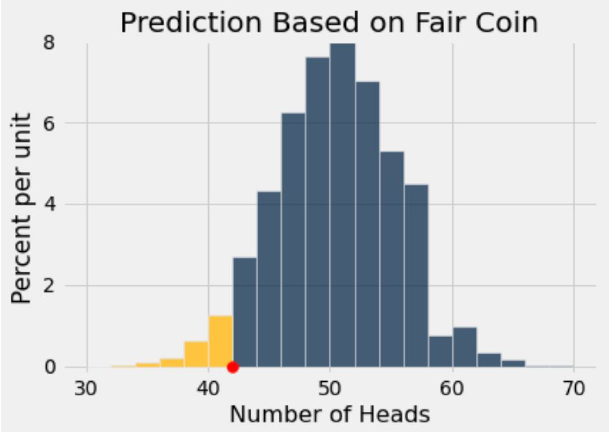


# A/B Tests and Causality

- Sample A: **control group**
- Sample B: **treatment group**
- If the treatment and control groups are selected at random, then you can make causal conclusions
- Any difference in outcomes between the two groups could be due to chance or the treatment.

<br>
Looking at the outcomes.  Then shuffle the group labels randomly assigning them to the results based on outcomes.  


In [12]:
bta = Table.read_table('bta.csv')
bta.show()

In [14]:
bta.group('Group', sum)

Group     | Result sum
Control   | 2
Treatment | 9